In [26]:
# Import libraries and magics
import numpy as np
import numpy.random as npr
import scipy.stats as stats
import sympy as sp
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interactive
from tqdm import trange
from sympy import oo #INFINITY
%matplotlib inline
plt.style.use('bmh')

In [27]:
#Parse CSV
#df = pd.read_csv('360Roll_3Dir.csv');
#df = pd.read_csv('testdata.csv');
df = pd.read_csv('oneAxis90HOLD.csv')
df['t'] = (df['t'] - df['t'][0])/1000000 #start t at 0, convert to s
df['dt'] = 0
df

,t,aX,aY,aZ,gX,gY,gZ,mX,mY,mZ,dt
0,0.000000,-0.01,-0.03,1.00,-0.01,0.03,0.06,37.82,-3.26,-28.55,0
1,0.043577,0.01,-0.03,1.00,0.35,0.46,0.19,38.18,-3.25,-27.12,0
2,0.093551,-0.01,-0.03,1.00,0.41,0.34,0.13,38.17,-3.59,-28.44,0
3,0.143696,0.00,-0.03,1.00,0.29,0.40,0.13,38.55,-3.43,-27.38,0
4,0.193712,0.01,-0.03,1.00,0.29,0.28,0.19,38.18,-3.00,-27.87,0
...,...,...,...,...,...,...,...,...,...,...,...
182,9.056588,0.00,-0.02,1.00,0.23,0.28,0.19,31.98,18.60,-29.15,0
183,9.107047,0.00,-0.04,1.01,0.29,0.40,0.19,32.04,18.08,-27.73,0
184,9.156005,0.00,-0.03,1.01,0.29,0.34,0.06,32.36,18.73,-27.83,0
185,9.205883,0.00,-0.03,1.00,0.35,0.28,0.13,32.17,18.29,-27.93,0


In [28]:
#Calculate dt, get radian angles
for i in range(1,df.shape[0]):
    df.loc[i,'dt'] = (df['t'][i])-(df['t'][i-1])
for i in range(df.shape[0]):
    df.loc[i,'gXr'] = np.deg2rad(df['gX'][i])
    df.loc[i,'gYr'] = np.deg2rad(df['gY'][i])
    df.loc[i,'gZr'] = np.deg2rad(df['gZ'][i])
df

,t,aX,aY,aZ,gX,gY,gZ,mX,mY,mZ,dt,gXr,gYr,gZr
0,0.000000,-0.01,-0.03,1.00,-0.01,0.03,0.06,37.82,-3.26,-28.55,0.000000,-0.000175,0.000524,0.001047
1,0.043577,0.01,-0.03,1.00,0.35,0.46,0.19,38.18,-3.25,-27.12,0.043577,0.006109,0.008029,0.003316
2,0.093551,-0.01,-0.03,1.00,0.41,0.34,0.13,38.17,-3.59,-28.44,0.049974,0.007156,0.005934,0.002269
3,0.143696,0.00,-0.03,1.00,0.29,0.40,0.13,38.55,-3.43,-27.38,0.050145,0.005061,0.006981,0.002269
4,0.193712,0.01,-0.03,1.00,0.29,0.28,0.19,38.18,-3.00,-27.87,0.050016,0.005061,0.004887,0.003316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,9.056588,0.00,-0.02,1.00,0.23,0.28,0.19,31.98,18.60,-29.15,0.048587,0.004014,0.004887,0.003316
183,9.107047,0.00,-0.04,1.01,0.29,0.40,0.19,32.04,18.08,-27.73,0.050459,0.005061,0.006981,0.003316
184,9.156005,0.00,-0.03,1.01,0.29,0.34,0.06,32.36,18.73,-27.83,0.048958,0.005061,0.005934,0.001047
185,9.205883,0.00,-0.03,1.00,0.35,0.28,0.13,32.17,18.29,-27.93,0.049878,0.006109,0.004887,0.002269


In [29]:
#Calculate orientation using Madgwick Filter
from ahrs.ahrs.filters import Madgwick
angles = Madgwick()
Q = np.tile([1., 0., 0., 0.],(df.shape[0], 1)) # Allocate for quaternions
for i in range(1,df.shape[0]):
    Q[i] = angles.updateMARG(Q[i-1], gyr=(df.loc[i].to_numpy())[11:], acc=(df.loc[i].to_numpy())[1:4], mag=(df.loc[i].to_numpy())[11:], dt= np.mean(df['dt']))

In [30]:
#Convert Quaternion states into euler angles
from ahrs.ahrs.common import Quaternion
xAngles = []
yAngles = []
zAngles = []
for i in range(df.shape[0]):
    xyzAngles = np.rad2deg(Quaternion(Q[i]).to_angles())
    xAngles += [xyzAngles[0]]
    yAngles += [xyzAngles[1]]
    zAngles += [xyzAngles[2]]

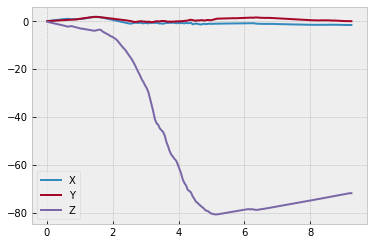

In [31]:
#Plot euler angle displacement
plt.plot(df['t'],xAngles,label='X')
plt.plot(df['t'],yAngles,label='Y')
plt.plot(df['t'],zAngles, label='Z')

plt.legend()